#### Name: Varigonda Sai Nirmal Vignu
#### Emial: varigondanirmal1@gmail.com
#### Mobile_no: 8106701825

### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score 
import warnings
warnings.filterwarnings('ignore')

### Reading data

In [2]:
df=pd.read_csv('dataframe_.csv')

In [3]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


### Numerical Analysis

In [4]:
rows,colums = df.shape
print("No of rows:",rows)
print("No of columns:",colums)

No of rows: 1697
No of columns: 2


In [5]:
df.columns

Index(['input', 'output'], dtype='object')

In [6]:
df.info() #it gives total info such as no of non-null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [7]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [8]:
df.isnull().sum() #is used to find null values in the taken data

input     1
output    1
dtype: int64

#### We can see that both the column contains one null value each

In [9]:
df.dtypes

input     float64
output    float64
dtype: object

In [10]:
df[df['input'].isna()]

,input,output
1439,NaN,NaN


Here we can see that at the index 1439 both the input and output column contains null value, we can drop that row from the data frame

In [11]:
df.drop(1439,axis=0,inplace=True)

In [12]:
df.shape

(1696, 2)

In [13]:
df.isnull().sum()

input     0
output    0
dtype: int64

 No null values

### Visualizing data

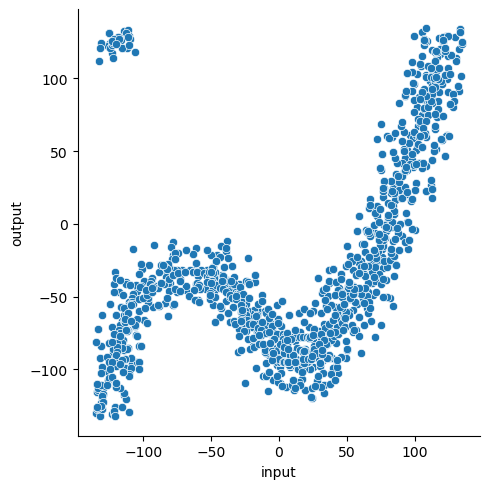

In [14]:
sns.relplot(x="input", y="output", data=df, kind='scatter')

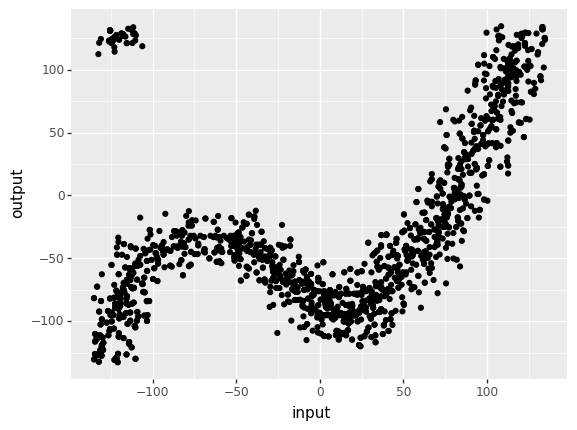

<ggplot: (126519496153)>

In [15]:

from plotnine import ggplot, aes, geom_point

ggplot(df) + aes(x="input", y="output") + geom_point()

#### Obervations:
1. We can see there is a  good relation between input and output variable by using above plot, we can see there is a smooth curve in the plot
2. And also we can clearly observe from above plot at top left corner  there are outliers in the give data which may effect our model in future, so we have to handle those outliers

### Handling Outliers

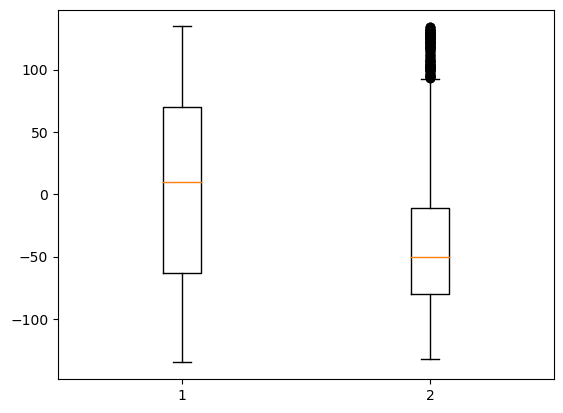

In [16]:
plt.boxplot(df)
plt.show()

In [17]:
df = df[(df['input'] > -100) | (df['output'] < 100)]

In [18]:
df.shape

(1657, 2)

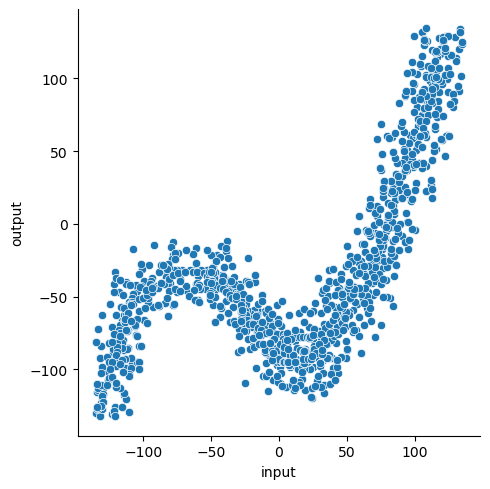

In [19]:
sns.relplot(x="input", y="output", data=df, kind='scatter')

##### We can see outliers are successfully handeled above.

### Split the data into training and testing data (taking 25% data as test data)

In [20]:
X=df[['input']]
Y=df['output']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=40)

In [22]:
len(X_train)

1242

### Model Building

#### Linear Regression

In [39]:
lr_reg=LinearRegression(normalize=True,fit_intercept=True)
lr_reg.fit(X_train,y_train)
y_predict=lr_reg.predict(X_test)

#### Evaluation metrics

In [40]:
score=lr_reg.score(X_test,y_test)
print("Score:",score)
print("MAE:",mean_absolute_error(y_test,y_predict))
print("MSE:",mean_squared_error(y_test,y_predict))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict)))

Score: 0.45198507889325423
MAE: 38.66104345658484
MSE: 2184.7565577883324
RMSE 46.7413795024102


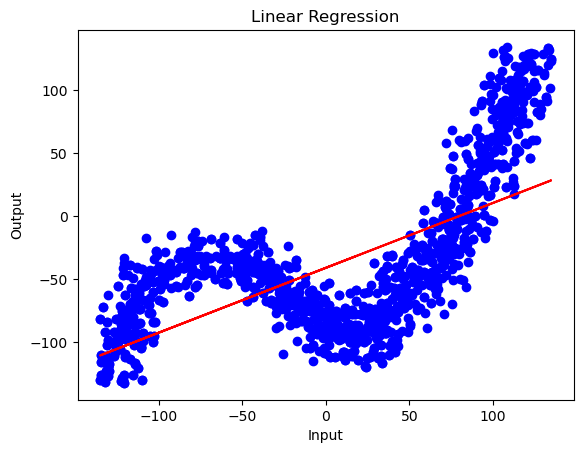

In [25]:
plt.scatter(X, Y, color = 'blue')
  
plt.plot(X, lr_reg.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Input')
plt.ylabel('Output')
  
plt.show()

#### Linear Regression in not at all suitable for our model we can see from above Linear Regression graph,The Regression line not fitted the data points, and also all the metrics values are very high and score is very less from graph we can say that the best fitted line may be polynomial regression line with degree >=3 

### Polynomial Regression with degree=4

In [26]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)
poly.fit(X_poly, y_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

y_predict2=poly_reg.predict(X_test_poly)

#### Evaluation metrics

In [27]:
score2=poly_reg.score(X_test_poly,y_test)
print("Score:",score2)
print("MAE:",mean_absolute_error(y_test,y_predict2))
print("MSE:",mean_squared_error(y_test,y_predict2))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict2)))

Score: 0.8723919506908603
MAE: 17.427338441629434
MSE: 508.73162721862246
RMSE 22.555079853962443


### Hyper Perameter tuning Polynomial Regression using cross validation

In [34]:
degrees = np.arange(10) # Change degree "hyperparameter" here
normalizes = [True, False] # Change normalize hyperparameter here
best_score = 0
best_degree = 0
for degree in degrees:
    for normalize in normalizes:
        poly_features = PolynomialFeatures(degree = degree)
        X_train_poly = poly_features.fit_transform(X_train)
        polynomial_regressor = LinearRegression(normalize=normalize)
        polynomial_regressor.fit(X_train_poly, y_train)
        scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=5) # Change k-fold cv value here
        if max(scores) > best_score:
            best_score = max(scores)
            best_degree = degree
            best_normalize = normalize
            print(best_score,best_degree)

0.4849736295095667 1
0.7173540074675231 2
0.7173540074675238 2
0.857618565085285 3
0.8576185650853048 3
0.8977974144008544 4
0.8977974144031579 4
0.9097005268594929 5
0.9110341588711386 6
0.9111076054240889 7
0.9121020901078625 8
0.9122185024907096 9


#### From degree=1 to degree=9, polynomial with degree of 9 gives more score and we can see the remaining metrics below

In [35]:
print(best_score)

0.9122185024907096


In [36]:
print(best_normalize)
print(best_degree)

True
9


In [37]:
poly2 = PolynomialFeatures(degree = 9)
X_poly2 = poly2.fit_transform(X_train)
X_test_poly2=poly2.fit_transform(X_test)
poly2.fit(X_poly2, y_train)
poly2_reg = LinearRegression(normalize=True)
poly2_reg.fit(X_poly2, y_train)

y_predict3=poly2_reg.predict(X_test_poly2)

#### Evaluation metrics

In [38]:
score3=poly2_reg.score(X_test_poly2,y_test)
print("Score:",score3)
print("MAE:",mean_absolute_error(y_test,y_predict3))
print("MSE:",mean_squared_error(y_test,y_predict3))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict3)))

Score: 0.885568172875693
MAE: 16.112637596117633
MSE: 456.2023315435108
RMSE 21.358893499980535


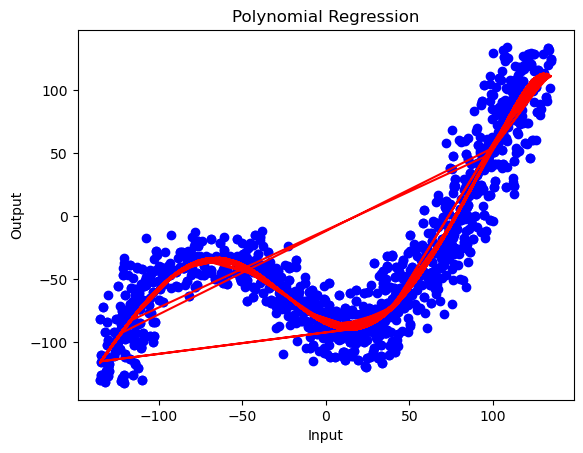

In [33]:
plt.scatter(X, Y, color = 'blue')
  
plt.plot(X, poly2_reg.predict(poly2.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Input')
plt.ylabel('Output')
  
plt.show()

### Final Observation:
* After Handling Outliers We tried with:
	1. Linear Regression
    	* When we try to fit Linear Regression Linear Regression in not at all suitable for our model we can see from above Linear Regression graph,The Regression line not fitted the data points, and also all the metrics values are very high and score is very less from graph we can say that the best fitted line may be polynomial regression line with degree >=3
        * performance metrics of linear Regression
        	1. Score: 0.45198507889325423
            2. MAE: 38.66104345658484
            3. MSE: 2184.7565577883324
            4. RMSE 46.7413795024102
        
    2. Polynomial Regression with degree=4(whic we assumed by seeing plot)
    
    3. Hyper parameter tuning Polynomial Regression by cross validation
		* From Hyper peramater tuning we got best degree=9 
* Best model is Polynomial Regression with degree=9 and the model metrics are as below
    1. Score: 0.885568172875693
    2. MAE: 16.112637596117633
    3. MSE: 456.2023315435108
    4. RMSE 21.358893499980535